In [3]:
import scikitplot as skplt
import matplotlib.pyplot as plt


In [14]:
y_true =   [1,0]
y_probas = [0.54, 0.61]
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

C:\Users\Telahun\Anaconda3\envs\dmg\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
C:\Users\Telahun\Anaconda3\envs\dmg\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


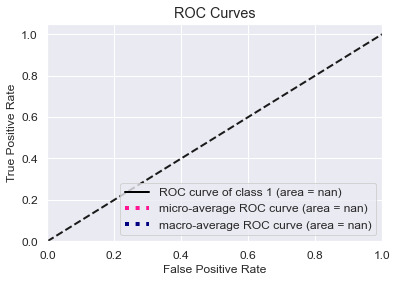

In [9]:
y_true =[[1]]
y_probas = [[1]]
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [6]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()#set_style("dark")

In [3]:
a = []
a.append([2.5, 1.6, 5.9])
a.append([7.2, 4.3, 2.1])
a.append([3.4, 5.8, 1.6])
a.append([5.6, 3.6, 6.8])
a.append([4.8, 7.2, 3.1])
a.append([8.1, 4.9, 8.3])
a.append([6.3, 4.8, 2.4])
a = np.array(a)

In [4]:
targs = [0,1,1,0,1,0,1]

In [5]:
a

array([[2.5, 1.6, 5.9],
       [7.2, 4.3, 2.1],
       [3.4, 5.8, 1.6],
       [5.6, 3.6, 6.8],
       [4.8, 7.2, 3.1],
       [8.1, 4.9, 8.3],
       [6.3, 4.8, 2.4]])

In [6]:
a[:,2]

array([5.9, 2.1, 1.6, 6.8, 3.1, 8.3, 2.4])

In [7]:
a[:,1][0]

1.6

In [8]:
A0 = []
B0 = []

A1 = []
B1 = []

A2 = []
B2 = []

for i, targ in enumerate(targs):
    if targ == 0:
        A0.append(a[:,0][i])
        A1.append(a[:,1][i])
        A2.append(a[:,2][i])
    else:
        B0.append(a[:,0][i])
        B1.append(a[:,1][i])
        B2.append(a[:,2][i])

In [9]:
varA0, varB0 = np.var(A0), np.var(B0)
varA1, varB1 = np.var(A1), np.var(B1)
varA2, varB2 = np.var(A2), np.var(B2)

r0 = (varA0/len(A0)) + (varB0/len(B0))
r1 = (varA1/len(A1)) + (varB1/len(B1))
r2 = (varA2/len(A2)) + (varB2/len(B2))

SE0 = math.sqrt(r0)
SE1 = math.sqrt(r1)
SE2 = math.sqrt(r2)

s0 =  abs(np.array(A0).mean() - np.array(B0).mean())
s1 =  abs(np.array(A1).mean() - np.array(B1).mean())
s2 =  abs(np.array(A2).mean() - np.array(B2).mean())

rank0 = s0/SE0
rank1 = s1/SE1
rank2 = s2/SE2

sorted([rank0, rank1, rank2], reverse=True)

[7.427485026503828, 2.249249097997478, 0.016577179105925148]

## Relief

In [38]:
b = []
b.append([2.7, 3.4, 1])
b.append([3.1, 6.2, 2])
b.append([4.5, 2.8, 1])
b.append([5.3, 5.8, 2])
b.append([6.6, 3.1, 1])
b.append([5.0, 4.1, 2])
# b = np.array(b)

In [39]:
b = []
b.append([2.7, 3.4, 1, 'A'])
b.append([3.1, 6.2, 2, 'A'])
b.append([4.5, 2.8, 1, 'B'])
b.append([5.3, 5.8, 2, 'B'])
b.append([6.6, 3.1, 1, 'A'])
b.append([5.0, 4.1, 2, 'B'])

In [20]:
targets = ['A','A','B','B','A','B']

In [19]:
b

array([[2.7, 3.4, 1. ],
       [3.1, 6.2, 2. ],
       [4.5, 2.8, 1. ],
       [5.3, 5.8, 2. ],
       [6.6, 3.1, 1. ],
       [5. , 4.1, 2. ]])

In [16]:
list(range(0,3))

[0, 1, 2]

In [40]:
def distance(a, b):
    x1, y1, z1 = a[0], a[1], a[2]
    x2, y2, z2 = b[0], b[1], b[2]
    d = math.sqrt(math.pow((x2 - x1), 2) + math.pow((y2 - y1),2) + math.pow((z2 - z1), 2))/2
    return d

In [41]:
def qualityScore(X, H, M, m):
    quality = (-math.pow((X-H), 2) + math.pow((X-M), 2))/m
    return quality

In [42]:
def relief(b):
    ## b is the dataset like [2.7, 3.4, 1, 'A']
    Wajs = []
    for m, sample in enumerate(b):
        Waj = 0.0
        
        nearestH, nearestM = [], []
        hits, misses = [], []
        distsH, distsM = [], []

        Xclass = targets[m]
        
        ## remove the subset of features from the elements we want
        ## to find the nearest hit/miss from
        samplesMinusX = b.copy()
        samplesMinusX.remove(sample)
        
        
        ## get each hist/miss and calculate the distances for each
        ## with the sample under consideration
        for sample2 in samplesMinusX:
            if sample[len(sample)-1] == sample2[len(sample2)-1]:
                hits.append(sample2)
                distsH.append(distance(sample, sample2))
            else:
                misses.append(sample2)
                distsM.append(distance(sample, sample2))

        
        ## get the nearest hit and miss
        nearestH = hits[min(range(len(distsH)), key=distsH.__getitem__)]
        nearestM = misses[min(range(len(distsM)), key=distsM.__getitem__)]


        ## feature wise quality update 
        for i in range(0,3):
            Waj += qualityScore(sample[i], nearestH[i], nearestM[i], m+1)

        Wajs.append(Waj)
        print(m)
    return Wajs

In [43]:
relief(b)

0
1
2
3
4
5


[-5.400000000000002,
 -2.0000000000000013,
 0.22000000000000003,
 0.5049999999999997,
 -2.1599999999999993,
 0.26999999999999974]

## ChiMerge

In [50]:
c,d = [], []
c.append([2.7, 'A'])
c.append([3.1, 'A'])
c.append([4.5, 'B'])
c.append([5.3, 'B'])
c.append([5.0, 'B'])
c.append([6.6, 'A'])
c = np.array(c)
c = c[c[:,0].argsort()]

d.append([3.4, 'A'])
d.append([6.2, 'A'])
d.append([2.8, 'B'])
d.append([5.8, 'B'])
d.append([4.1, 'B'])
d.append([3.1, 'A'])
d = np.array(d)
d = d[d[:,0].argsort()]

In [52]:
c,d

(array([['2.7', 'A'],
        ['3.1', 'A'],
        ['4.5', 'B'],
        ['5.0', 'B'],
        ['5.3', 'B'],
        ['6.6', 'A']], dtype='<U32'),
 array([['2.8', 'B'],
        ['3.1', 'A'],
        ['3.4', 'A'],
        ['4.1', 'B'],
        ['5.8', 'B'],
        ['6.2', 'A']], dtype='<U32'))

In [139]:
# c_interval = [0.0, 2.9, 3.9, 4.9, 5.2, 5.9, 6.9]
# d_interval = [0.0, 2.9, 3.2, 3.9, 4.9, 5.9, 6.9]
c_interval = [0, 2.90, 3.8, 4.75, 5.15, 5.94, 6.8]
d_interval = [0, 2.95, 3.25, 3.75, 4.95, 6.0, 6.5]

In [56]:
c[:,0]

array(['2.7', '3.1', '4.5', '5.0', '5.3', '6.6'], dtype='<U32')

#### Merge (1) X1

Interval: [0, 2.9], [2.9, 3.8]
- E11 = 1, E12 ~ 0.1
- E21 = 1, E22 ~ 0.1
- 0.2 < 2.706 so merge 
    - [0, 3.8]
    
Interval: [3.8, 4.75], [4.75, 5.15]
- E11 ~ 0.1, E12 = 1
- E21 ~ 0.1, E22 = 1
- X^2 = (0-0.01^2/0.01) + (1-1)^2/1 + (0-0.01)^/0.01 + (1-1)^2/1 = 0.2 < 2.706 so merge
    - [3.8, 5.15]

Interval: [5.15, 5.94], [5.94, 6.8]
- A11=0, A12=1, R1=1
- A21=1, A22=0, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [5.15, 6.8]

#### Merge (2) X1

Interval: [0, 3.8], [3.8, 5.15]
- A11=2, A12=0, R1=2
- A21=0, A22=2, R2=2
- C1 =2, C2 =2, N =4

- E11 = 1, E12 = 1
- E21 = 1, E22 = 1
- X^2 = 1 + 1 + 1 + 1 = 4.0 > 2.706 do not merge
    - Intervals remain unmerged
    
Interval: [3.8, 5.15], [5.15, 6.8]
- A11=0, A12=2, R1=2
- A21=1, A22=1, R2=3
- C1 =1, C2 =3, N =5

- E11 = 0.4, E12 = 1.2
- E21 = 0.6, E22 = 1.8
- X^2 = (0.-0.4)^2/0.4 + (2-1.2)^2/1.2 + (1-0.6)^2/0.6 + (1-1.8)^2/1.8 = 1.555 < 2.706 so merge
    - [3.8, 6.8]

#### Merge (3) X1

Interval: [5.15, 6.8]
- A11=0, A12=2, R1=2
- A21=1, A22=1, R2=3
- C1 =1, C2 =3, N =5

- E11 = 0.4, E12 = 1.2
- E21 = 0.6, E22 = 1.8
- X^2 = (0.-0.4)^2/0.4 + (2-1.2)^2/1.2 + (1-0.6)^2/0.6 + (1-1.8)^2/1.8 = 1.555 < 2.706 so merge
    - [3.8, 6.8]

In [141]:
c

array([['2.7', 'A'],
       ['3.1', 'A'],
       ['4.5', 'B'],
       ['5.0', 'B'],
       ['5.3', 'B'],
       ['6.6', 'A']], dtype='<U32')

In [147]:
u = []
u.append([2.5, 0])
u.append([7.2, 1])
u.append([3.4, 1])
u.append([5.6, 0])
u.append([4.8, 1])
u.append([8.1, 0])
u.append([6.3, 1])

u = np.array(u)
u = u[u[:,0].argsort()]

In [148]:
u

array([[2.5, 0. ],
       [3.4, 1. ],
       [4.8, 1. ],
       [5.6, 0. ],
       [6.3, 1. ],
       [7.2, 1. ],
       [8.1, 0. ]])

In [154]:
(7.2+8.1)/2

7.65

In [ ]:
u_interval = [0, 2.95, 4.1, 5.2, 5.95, 6.75, 7.65, 9]

#### Merge(1) I1

Interval: [0, 2.95], [2.95, 4.1]
- A11=1, A12=0, R1=1
- A21=0, A22=1, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [0, 4.1]
    
Interval: [2.95, 4.1], [4.1, 5.2]
- A11=0, A12=1, R1=1
- A21=0, A22=1, R2=1
- C1 =0, C2 =2, N =2

- E11 = 0.1, E12 = 1
- E21 = 0.1, E22 = 1
- X^2 = 0 + (0.1)^2/0.1 + 0 + (0.1)^2/0.1 = 0.2 < 2.706 so merge
    - [2.95, 5.2]
    

Interval: [4.1, 5.2], [5.2, 5.95]
- A11=0, A12=1, R1=1
- A21=1, A22=0, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [4.1, 5.95]
    
Interval: [5.2, 5.95], [5.95, 6.75]
- A11=1, A12=0, R1=1
- A21=0, A22=1, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [5.2, 6.75]

Interval: [5.95, 6.75], [6.75, 7.65]
- A11=0, A12=1, R1=1
- A21=0, A22=1, R2=1
- C1 =0, C2 =2, N =2

- E11 = 0.1, E12 = 1
- E21 = 0.1, E22 = 1
- X^2 = 0 + (0.1)^2/0.1 + 0 + (0.1)^2/0.1 = 0.2 < 2.706 so merge
    - [5.95, 7.65]
    
Interval: [6.75, 7.65], [7.65, 9]
- A11=0, A12=1, R1=1
- A21=1, A22=0, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [6.75, 9]

In [155]:
u

array([[2.5, 0. ],
       [3.4, 1. ],
       [4.8, 1. ],
       [5.6, 0. ],
       [6.3, 1. ],
       [7.2, 1. ],
       [8.1, 0. ]])

In [ ]:
u_interval = [0, 2.95, 4.1, 5.2, 5.95, 6.75, 7.65, 9]

#### Merge round (1)

Interval: [0, 2.95], [2.95, 4.1]
- A11=1, A12=0, R1=1
- A21=0, A22=1, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [0, 4.1]
    
Interval: [4.1, 5.2], [5.2, 5.95]
- A11=0, A12=1, R1=1
- A21=1, A22=0, R2=1
- C1 =1, C2 =1, N =2

- E11 = 0.5, E12 = 0.5
- E21 = 0.5, E22 = 0.5
- X^2 = 0.5 + 0.5 + 0.5 + 0.5 = 2.0 < 2.706 so merge
    - [4.1, 5.95]
    

Interval: [5.95, 6.75], [6.75, 7.65]
- A11=0, A12=1, R1=1
- A21=0, A22=1, R2=1
- C1 =0, C2 =2, N =2

- E11 = 0.1, E12 = 1
- E21 = 0.1, E22 = 1
- X^2 = 0 + (0.1)^2/0.1 + 0 + (0.1)^2/0.1 = 0.2 < 2.706 so merge
    - [5.95, 7.65]
    
Leaving the final interval [7.65, 9] for later iteration

In [156]:
u

array([[2.5, 0. ],
       [3.4, 1. ],
       [4.8, 1. ],
       [5.6, 0. ],
       [6.3, 1. ],
       [7.2, 1. ],
       [8.1, 0. ]])

In [ ]:
u_interval = [0, 2.95, 4.1, 5.2, 5.95, 6.75, 7.65, 9]

#### Merge round (2)

Interval: [0, 4.1], [4.1, 5.95]
- A11=1, A12=1, R1=2
- A21=1, A22=1, R2=2
- C1 =2, C2 =2, N =4

- E11 = 1, E12 = 1
- E21 = 1, E22 = 1
- X^2 = 1 + 1 + 1 + 1 = 4.0 > 2.706 do not merge
    - Intervals remain unmerged
   

Interval: [5.95, 7.65], [7.65, 9]
- A11=0, A12=2, R1=2
- A21=1, A22=0, R2=1
- C1 =1, C2 =2, N =3

- E11 = 0.6666, E12 = 1.3333
- E21 = 0.3333, E22 = 0.6666
- X^2 = (0-0.6666)^2/0.6666 +(1.0-0.3333)^2/0.3333 + (2.0-1.3333)^2/1.3333 + (0-0.6666)^2/0.6666  
    - =3.000 > 2.706 so do not merge
    - Intervals remain unmerged

#### Merge (3)

Interval: [4.1, 5.95], [5.95, 7.65]
- A11=1, A12=1, R1=2
- A21=0, A22=2, R2=2
- C1 =1, C2 =3, N =4

- E11 = 0.5, E12 = 1.6666
- E21 = 0.5, E22 = 1.6666
- X^2 = 0.5 + 0.5 + (0.6666)^/1.6666 + (2.0-1.6666)^2/1.6666  = 1.333 < 2.706 so merge
    - [4.1, 7.65]

final interval: [0, 4.1], [4.1, 7.65], [7.65, 9]


In [ ]:
2.05, 5.875, 8.325

In [159]:
ss.mean([7.65, 9])

8.325

In [70]:
# for i in range(0, len(c)-1):
#     print((float(d[:,0][i]) + float(d[:,0][i+1]))/2)

2.95
3.25
3.75
4.949999999999999
6.0


2.9000000000000004

## 3.12

In [77]:
import statistics as ss

In [72]:
sorted([4,2,1,6,4,3,1,6,2,2])

[1, 1, 2, 2, 2, 3, 4, 4, 6, 6]

In [73]:
bin1, bin2, bin3 = [1, 1, 2], [2, 2, 3], [4, 4, 6, 6]

In [83]:
ss.mean(bin1)

1.3333333333333333

In [91]:
error = 0.0
error1 = [abs(x - ss.mean(bin1)) for x in bin1]
error2 = [abs(x - ss.mean(bin2)) for x in bin2]
error3 = [abs(x - ss.mean(bin3)) for x in bin3]

In [97]:
error1, error2, error3

([0.33333333333333326, 0.33333333333333326, 0.6666666666666667],
 [0.3333333333333335, 0.3333333333333335, 0.6666666666666665],
 [1, 1, 1, 1])

In [92]:
sum(error1) + sum(error2) + sum(error3)

6.666666666666667

In [132]:
bin1, bin2, bin3 = [1, 1, 2], [2, 2, 3, 4], [4, 6, 6]

In [133]:
error = 0.0
error1 = [abs(x - ss.mean(bin1)) for x in bin1]
error2 = [abs(x - ss.mean(bin2)) for x in bin2]
error3 = [abs(x - ss.mean(bin3)) for x in bin3]

In [134]:
# error1, error2, error3

In [135]:
sum(error1) + sum(error2) + sum(error3)

7.0

In [127]:
bin11, bin22, bin33 = [1, 1, 2, 2], [2, 3, 4, 4], [6, 6]

In [128]:
error = 0.0
error11 = [abs(x - ss.mean(bin11)) for x in bin11]
error22 = [abs(x - ss.mean(bin22)) for x in bin22]
error33 = [abs(x - ss.mean(bin33)) for x in bin33]

In [129]:
# error11, error22, error33

In [130]:
sum(error11) + sum(error22) + sum(error33)

5.0

In [131]:
ss.median(bin11), ss.median(bin22), ss.median(bin33)

(1.5, 3.5, 6.0)